In [20]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import IBMQ,Aer,transpile,assemble
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
IBMQ.save_account('eb264c4a6d39359629fc0dd4d0031812fb511701c624409f3dd905af17e33f3d6d792b9b0b449b1931f1acdb2578aee7cde105c736e48c735e20603a378299c8')
provider=IBMQ.load_account()



configrc.store_credentials:WARNING:2023-05-20 15:19:57,781: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-05-20 15:19:58,240: Credentials are already in use. The existing account in the session will be replaced.


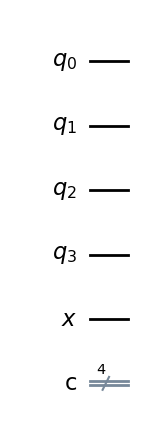

In [21]:
n=int(input())
n_qubits=QuantumRegister(n,name='q')
x=QuantumRegister(1,name='x')
n_bits=ClassicalRegister(n,name='c')
circuit=QuantumCircuit(n_qubits,x,n_bits)
circuit.draw(output='mpl')


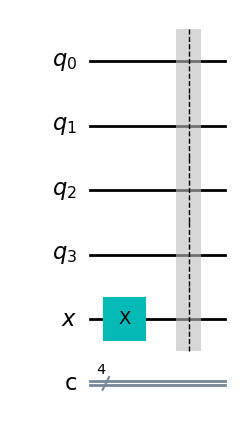

In [22]:
circuit.x(x)
circuit.barrier()
circuit.draw(output='mpl')

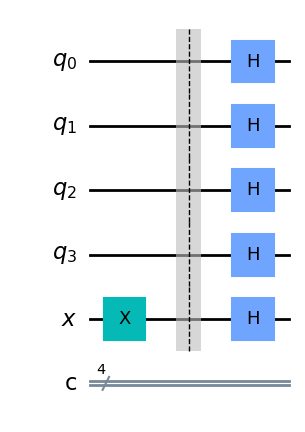

In [23]:
for i in range(n+1):
    circuit.h(i)
circuit.draw(output='mpl')

In [24]:
def oracle(a,circuit,number_of_bits):
    if len(a)==number_of_bits:
        for i in range(number_of_bits):
            if a[i]=='1':
                circuit.cx(i,n)
    else:
        print("Invalid Input")
        exit()

Enter string 'a' for oracle function: of length  4


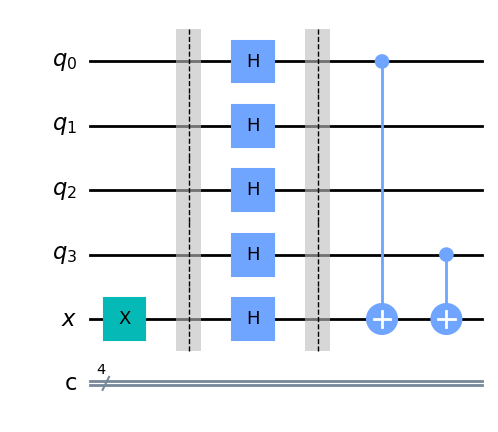

In [25]:
circuit.barrier()
print("Enter string 'a' for oracle function: of length ",n)
a=input()
oracle(a,circuit,n)
circuit.draw(output='mpl')

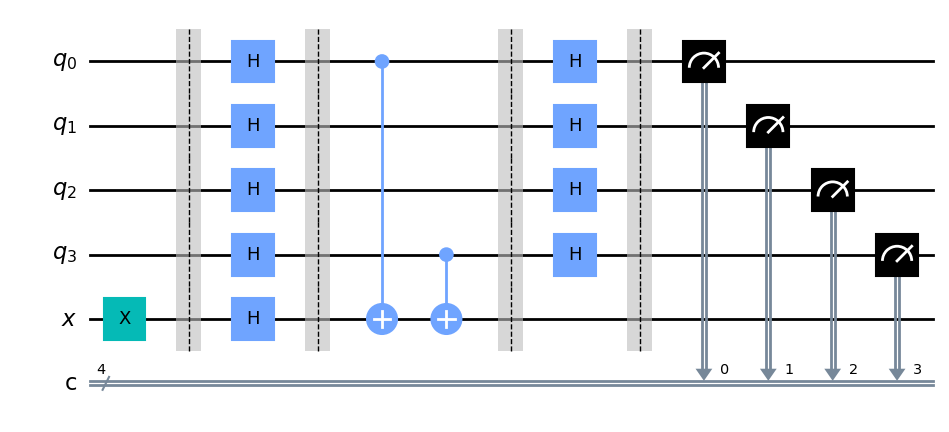

In [26]:
circuit.barrier()
for i in range(n):
    circuit.h(i)
circuit.barrier()
for i in range(n):
    circuit.measure(i,i)
circuit.draw(output='mpl')

{'1001': 1000}


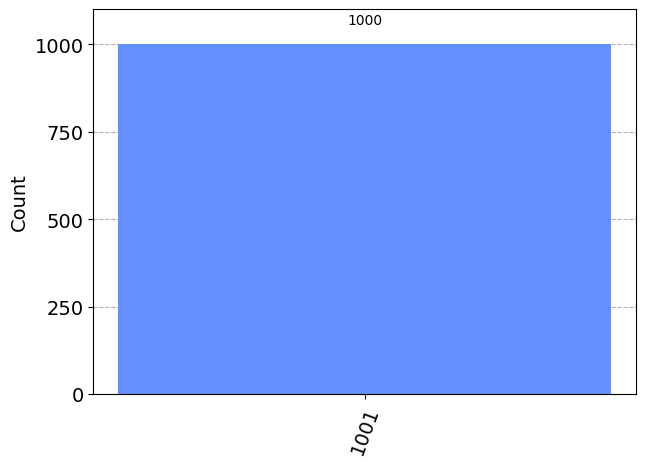

In [30]:
sim=Aer.get_backend('qasm_simulator')
# sim.save_statevector()
counts=sim.run(circuit,shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)


In [28]:
provider=IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend=least_busy(provider.backends(filters= lambda b: b.configuration().n_qubits>=5 and not b.configuration().simulator and b.status().operational==True))
t_qc=transpile(circuit,backend)
job=backend.run(t_qc,shots=1000)
job_monitor(job)

Job Status: job has successfully run


{'0000': 7, '0001': 38, '0011': 5, '0101': 2, '0111': 1, '1000': 42, '1001': 821, '1010': 3, '1011': 61, '1100': 1, '1101': 16, '1111': 3}


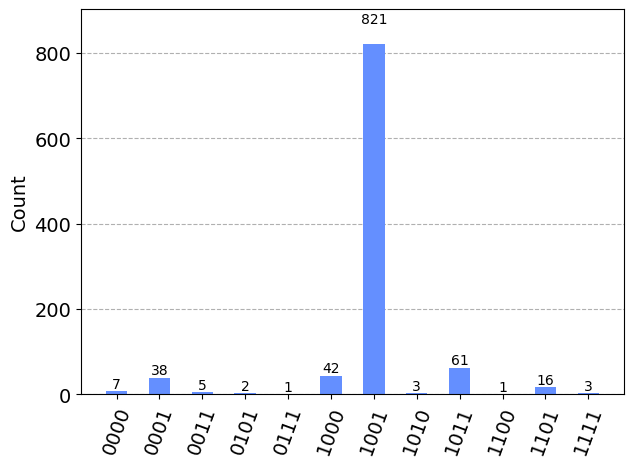

In [29]:
exp_result=job.result()
exp_counts=exp_result.get_counts(circuit)
print(exp_counts)
plot_histogram(exp_counts)